In [21]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [22]:
data1 = pd.read_csv('data1.csv',header = None)
data2 = pd.read_csv('data2.csv',header = None)
data3 = pd.read_csv('data3.csv',header = None)
data4 = pd.read_csv('data4.csv',header = None)

In [23]:
#function below is for calculating distance between two dots of the same dimention
def distanceCalculate(dot1,dot2,dimention):
    res = 0
    for i in range(dimention):
        res += math.pow(dot1[i]-dot2[i],2)
    return math.sqrt(res)

In [24]:
#function below is for creating belonging values 
def createBelongingValues(dotsList,dimention,centresList,m):
    finalRes = []
    for i in range(len(dotsList)):
        if dotsList[i] in centresList:
            midRes = [0]*len(centresList)
            for counter in range(len(centresList)):
                if dotsList[i] == centresList[counter]:
                    midRes[counter] = 1
            finalRes.append(midRes)
        else:
            midRes = []
            for j in range(len(centresList)):
                distance1 = distanceCalculate(dotsList[i],centresList[j],dimention)
                midDistance = 0
                for k in range(len(centresList)):
                    distance2 = distanceCalculate(dotsList[i],centresList[k],dimention)
                    midDistance += math.pow(distance1/distance2,2/(m-1))
                midRes.append(1/midDistance)
            finalRes.append(midRes)
    return finalRes

In [25]:
#code below is for updating our centres
def updateCentres(dotsList,centresList,belongingValues,dimention,m):
    for k in range(dimention):
        for i in range(len(centresList)):
            sorat = 0
            makhraj = 0
            for j in range(len(dotsList)):
                sorat += dotsList[j][k]*math.pow(belongingValues[j][i],m)
                makhraj += math.pow(belongingValues[j][i],m)
            centresList[i][k] = sorat/makhraj
    return centresList

In [26]:
#code below is for calculating cost
def cost(dotsList,centresList,belongingValues,dimention,m):
    res = 0
    for i in range(len(dotsList)):
        for j in range(len(centresList)):
            res += math.pow(belongingValues[i][j],m)*distanceCalculate(dotsList[i],centresList[j],dimention)
    return res

In [27]:
#code below is reading data and making our dots
def readData(data,dimention):
    res = []
    for i in range(len(data)):
        midRes = []
        for j in range(dimention):
            midRes.append(data.iloc[i][j])
        res.append(midRes)
    return res

In [28]:
#code below is for creating random centres according to centers number
def randomCentreCreate(centresNumber,dimention):
    res = []
    for i in range(centresNumber):
        midRes = []
        for j in range(dimention):
            midRes.append(random.randrange(-30,30))
        res.append(midRes)
    return res

In [29]:
#code below is for calculating final centres list using elbow algorithm
def engine(data,centresNumber,m):
    dimention = len(data.columns)
    dotsList = readData(data,dimention)
    centresList = randomCentreCreate(centresNumber,dimention)
    belongingValues = []
    for i in range(100):
        belongingValues = createBelongingValues(dotsList,dimention,centresList,m)
        centresList = updateCentres(dotsList,centresList,belongingValues,dimention,m)
    print(centresList)
    return centresList,belongingValues,dotsList

In [30]:
#code below is for plotting cost using differnt centre numbers
def costPlot(data,m):
    dimention = len(data.columns)
    costs = []
    values = []
    for i in range(1,7):
        values.append(engine(data,i,m))
    for i in range(6):
        costs.append(cost(values[i][2],values[i][0],values[i][1],dimention,m))
    plt.plot(costs)
    plt.show()

[[370.8212552247382, 238.04998556602473]]
[[236.31351783070386, 239.078744304391], [485.4976014854769, 233.92981165918064]]
[[203.52790304295817, 236.62327187870227], [476.7024297692613, 121.29957376064517], [451.24944061038525, 360.7792672068553]]
[[457.84656269849216, 363.2310729616271], [182.60618204555828, 254.56259768476392], [277.5421875041575, 212.7292154327832], [488.3644774410729, 125.32321639493371]]
[[433.4959005079459, 388.77990690780786], [175.99094235210785, 264.0051443488281], [457.26104234888635, 78.58393089566384], [518.4063074737902, 238.67489960452352], [243.10790783380776, 210.87781999002567]]
[[504.08675482515224, 284.77377187451555], [173.28198016339837, 266.7615608447151], [420.03830934461297, 401.205693874197], [233.1127847115589, 211.66799522093498], [436.7039092077079, 58.88649493848081], [507.34335147244286, 162.566020908304]]


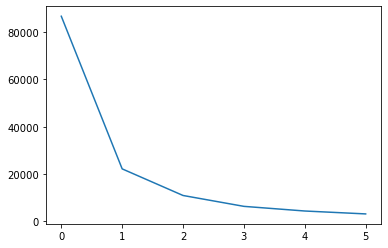

In [31]:
costPlot(data1,3)

[[0.5972229650945895, 0.5944854447593763, 0.5948438850390718, 0.5950800107992171]]
[[0.3291122884231305, 0.32875139343620086, 0.3282780965666567, 0.32853604825474764], [0.7574165601745178, 0.7527903425050765, 0.7533897366905387, 0.7536808229773504]]
[[0.15486920586197112, 0.1551270208582036, 0.15412924084867724, 0.15300550003440688], [0.7874875878997506, 0.7826615821203144, 0.7829642897816181, 0.783632705128771], [0.5869074151173743, 0.584333584436291, 0.5854200685680542, 0.5862895031546603]]
[[0.11015289679818122, 0.1115312241787773, 0.11156524424973252, 0.1097156766235139], [0.7962452341312031, 0.7916767013439998, 0.7919775229646252, 0.7926182774303591], [0.6371222196587027, 0.6334874244529117, 0.6354788457858318, 0.6353384464920081], [0.4003395942393999, 0.4009111550384905, 0.40026340060585125, 0.4007583699513269]]
[[0.39923874233874534, 0.4000106165649384, 0.3993049211358216, 0.39960991664298795], [0.6310610586868156, 0.6275307102281443, 0.6293212770569637, 0.6298273153053838], [0.

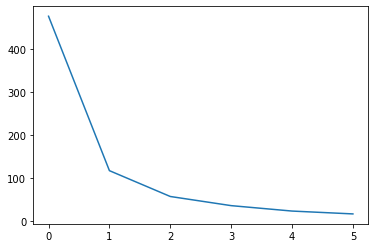

In [32]:
costPlot(data2,3)

[[0.4196479461237563, 0.5448015596511756]]
[[0.4608829111844064, 0.3113351474181203], [0.3951387491806278, 0.6992050896612543]]
[[0.21733551295282025, 0.6202033236759288], [0.5231953989413861, 0.2100884069641951], [0.5183891255578307, 0.7063541330060641]]
[[0.5426793896047533, 0.17430451464951588], [0.37192155329718274, 0.734317671121212], [0.6769225339060227, 0.6786342508239358], [0.18921326747309644, 0.472690873361052]]
[[0.17732041924622102, 0.737465252733224], [0.5536773879199157, 0.15783654700384428], [0.8226969294735094, 0.6850051314379227], [0.4571167231147197, 0.7166410455675353], [0.19742305265326238, 0.4221527702556761]]
[[0.8433620367534652, 0.6905172344191757], [0.45026348457698373, 0.7446189147260658], [0.45725507390457737, 0.5903463683876256], [0.15873007562733915, 0.7439808089180273], [0.5604429295370326, 0.1456043523942209], [0.1820588553805918, 0.41542756786466756]]


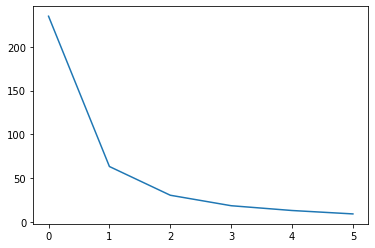

In [33]:
costPlot(data3,3)

[[0.7158202720665682, 0.7177015980891471, 0.7140425356720662]]
[[0.5193036391704581, 0.5231953787262348, 0.5138746379076005], [0.8370722471860248, 0.8377174964104073, 0.8366619323719215]]
[[0.8859541084715845, 0.8877324399350333, 0.8846449984847757], [0.7493555084093996, 0.750503833510578, 0.7506661700189048], [0.5109446305303054, 0.5154222273242391, 0.5048928643986518]]
[[0.7624461949234556, 0.7612444389967391, 0.7628033227589246], [0.8873602408809826, 0.8899026618527689, 0.886111280823135], [0.7424758999734032, 0.7453821105717755, 0.74370809159025], [0.5103631425377778, 0.5153392200248743, 0.5039373469315976]]
[[0.7511457117815512, 0.7511584183266959, 0.7579255698397951], [0.7420104449728773, 0.7447166798751199, 0.7385075506882577], [0.5101299735892509, 0.5154357561994357, 0.5034602917851326], [0.889187770345111, 0.8752976656722473, 0.8787409222708319], [0.8810253936616033, 0.8981917709195801, 0.8888877159425412]]
[[0.8817312516549474, 0.8992920915627127, 0.8899552011427401], [0.7613

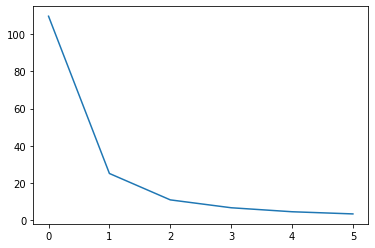

In [34]:
costPlot(data4,3)

In [36]:
#code below is for testing differnt m values on data1
c1,b1,d1 = engine(data1,5,2)
print(cost(d1,c1,b1,2,2))
c2,b2,d2 = engine(data1,5,3)
print(cost(d1,c1,b1,2,3))
c3,b3,d3 = engine(data1,5,4)
print(cost(d1,c1,b1,2,4))
c4,b4,d4 = engine(data1,5,5)
print(cost(d1,c1,b1,2,5))
c5,b5,d5 = engine(data1,5,6)
print(cost(d1,c1,b1,2,6))

[[522.6274284520608, 235.66640351052163], [454.04653446925875, 72.55233194370177], [167.61959514507492, 262.12130157059767], [249.98400428675146, 207.73933805055162], [432.6663569355829, 394.8838465716837]]
16870.254551735394
[[175.99093532663662, 264.0051339649659], [518.4063075200078, 238.67490338355836], [243.10792311360254, 210.8778272469546], [433.49589666924794, 388.77991033378186], [457.2610442759114, 78.58393232302456]]
11515.751578143143
[[512.423199371854, 237.71135365264598], [183.76819070337885, 264.19115156346066], [238.83835157239787, 213.97336544384294], [458.6718906320269, 84.1700239566685], [438.6099502862742, 380.0665927151221]]
8812.585016802926
[[461.6080079192578, 90.10606500151916], [440.56256627908596, 375.45664179915025], [237.65045110950487, 215.63896328261941], [506.9433437159419, 238.52129565096874], [187.84869271110782, 262.7357506596816]]
7072.296518053891
[[498.4095803552624, 242.47589738411824], [191.09203454198052, 252.87263791411795], [252.5103232966015

[[183.7723191245323, 264.1972886832971], [458.6704993568409, 84.16890387405553], [438.61258235728343, 380.0648546406897], [238.82881683585265, 213.9708271194206], [512.423161772247, 237.70997442970068]]


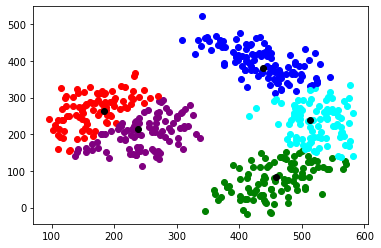

In [41]:
#creating colors and plots for 2d data
#consider 5 differnt groups colors in order are red,green,blue,purple,cyan and the centres are black
c1,b1,d1 = engine(data1,5,4)
for i in range(len(d1)):
    x = d1[i][0]
    y = d1[i][1]
    if b1[i][0] == max(b1[i]):
        plt.scatter(x,y,color = 'red')
    elif b1[i][1] == max(b1[i]):
        plt.scatter(x,y,color = 'green')
    elif b1[i][2] == max(b1[i]):
        plt.scatter(x,y,color = 'blue')
    elif b1[i][3] == max(b1[i]):
        plt.scatter(x,y,color = 'purple')
    else:
        plt.scatter(x,y,color = 'cyan' )
plt.scatter(c1[0][0],c1[0][1],color = 'black')
plt.scatter(c1[1][0],c1[1][1],color = 'black')
plt.scatter(c1[2][0],c1[2][1],color = 'black')
plt.scatter(c1[3][0],c1[3][1],color = 'black')
plt.scatter(c1[4][0],c1[4][1],color = 'black')
plt.show()

[[0.20797248862210235, 0.4302704729161173], [0.5530271473874282, 0.158177751870138], [0.19143069001671514, 0.7256998210449331], [0.803164110228275, 0.6779372397579797], [0.4539085801493438, 0.7158055253585185]]


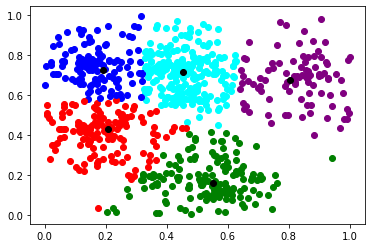

In [43]:
#creating colors and plots for 2d data
#consider 5 differnt groups colors in order are red,green,blue,purple,cyan and the centres are black
#plotting for third data
c3,b3,d3 = engine(data3,5,4)
for i in range(len(d3)):
    x = d3[i][0]
    y = d3[i][1]
    if b3[i][0] == max(b3[i]):
        plt.scatter(x,y,color = 'red')
    elif b3[i][1] == max(b3[i]):
        plt.scatter(x,y,color = 'green')
    elif b3[i][2] == max(b3[i]):
        plt.scatter(x,y,color = 'blue')
    elif b3[i][3] == max(b3[i]):
        plt.scatter(x,y,color = 'purple')
    else:
        plt.scatter(x,y,color = 'cyan' )
plt.scatter(c3[0][0],c3[0][1],color = 'black')
plt.scatter(c3[1][0],c3[1][1],color = 'black')
plt.scatter(c3[2][0],c3[2][1],color = 'black')
plt.scatter(c3[3][0],c3[3][1],color = 'black')
plt.scatter(c3[4][0],c3[4][1],color = 'black')
plt.show()